# **Traffic Simulation**
## **Prof. Drummond | CS166** 
### Anirudh Nair

In [0]:
#sourcing the required libraries for the program
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.integrate import simps
from numpy import trapz

In [0]:
#defining the traffic simulation object
class trafficsimulator:
    
    #storing the pre-specified values for future use in the model implementation
    def __init__(self, road_length, density, max_velocity, random_p):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.random_p = random_p
        self.counter = 0
        self.initialize()

    #this funtion initializes a one-dimensional array filled with negative values to model the real-world road
    #and fills it with vehicles at random locations with random speeds based on the specified density
    def initialize(self):
      #initializing the array
        self.sim = -np.ones(self.road_length, dtype = int)
        #filling with vehicles
        for i in range(len(self.sim)):
            if random.random() <= self.density:
                self.sim[i] = random.randint(0,self.max_velocity)
                              
    #this function updates the array to simulate the movement on the road over one time step                          
    def update(self):
        #creating a temporary array to store the updated locations and velocities of the vehicles
        next_sim = -np.ones(self.road_length, dtype = int)
        
        #finding the locations of different vehicles present in the array and storing them under a seperate variable name
        car_indexes = np.argwhere(self.sim  > -1)
        number_of_cars = len(car_indexes)
        
      
        for i in range(number_of_cars):
            #storing the current vehicles's location, next vehicles's location and current vehicle's velocity
            ci = car_indexes[i]
            ni = car_indexes[(i+1)%number_of_cars]
            v = self.sim[ci]
            #calculating the distance between the current vehicle and the next one
            distance = (ni-ci)%self.road_length
            #accelerating the vehicle
            if v < self.max_velocity and distance >= v+1:
                v += 1
            #slowing down the vehicle
            if v > 0 and distance <= v:
                v = distance-1
            #slowing random vehicles down to add noise
            if v > 0 and random.random() <= self.random_p:
                v = v-1
            #updating the temporary array    
            next_sim[(ci+v)% self.road_length] = v
            #counting the number of vehicles passing through the last cell
            if ci + v >= self.road_length:
                self.counter += 1
        #updating the simulation        
        self.sim = next_sim
   #function to display the simulation for every time-step 
    def display(self):
        print(''.join('-' if x == -1 else str(x) for x in self.sim))

In [3]:
#defining different parameters for the traffic simulation so that they can be changed in the future
#for experimentation
length = 180
density = 0.2
max_v = 5
slowdown_prob = 0.4
iterations = 40

random.seed(42)

Simulation_1 = trafficsimulator(length, density, max_v, slowdown_prob)

for i in range(iterations):
    Simulation_1.update()
    Simulation_1.display()
    
Simulation_1.counter

1-1-1-0-1--1------0-00--2------------2--------3------4-----1------5------------1--2----4-----3-0----0------2-0---2-0----3-----5---------0-1--00----2------------5--1-00-1---------4-
-1-1-10--1---2-----100----2-------------3--------3-------4--1----------5---------2---3------50--1----1-----0--1---10-------3------4-----0--1-0-1------3----------1--10-1--2--------1
--1-100----2---2---00-1------3-------------3--------3-----1--1--------------5-------3----4--00----2---1-----1---2-00----------3-------4--1-0--1--2--------4-------1-0-1--2--2------0
--0-00-1------3--2-00---2--------4------------3--------3----2--2----------------4-------4--20-1------3--2----1--0-0-1------------3------20--1---2---3----------5---10--1---2--2----0
1--100---2-----1--10-1----2-----------5----------3--------3--1----3-----------------4-----20-1--2-----1---2----20--1--2-------------3---0-1--1-----3----4---------300----2--1---2---
--200-1-----3----20-1-1------3-------------5---------4------2--2-----3-------------------50-1--

13

In [4]:
#defining different parameters for the traffic simulation so that they can be changed in the future
#for experimentation
length = 180
density = 0.4
max_v = 5
slowdown_prob = 0.4
iterations = 40

random.seed(42)

Simulation_1 = trafficsimulator(length, density, max_v, slowdown_prob)

for i in range(iterations):
    Simulation_1.update()
    Simulation_1.display()
    
Simulation_1.counter

10--2-00-----5--10000--2---0----4--2--0-00-1-00-1--2-1--1---30---3-0--1--2-1-0-0--2--2---1-00----3--1--20-1--2---2-1--2----30-100-0-00-1--0-0-----4--20000-0-----5---3-10----40-1---
00---100-------20000-1---2-0-----1--1--10-1-100---20---2--2-00---0-0----20--1-1-1--1----3-100-----1--1-0-1--2--2-0---2---3-00-000--10-1-1--1-1------20000-1-1------2-0-0-1---00---2-
00---00-1------0000-1--2--1-1-----1--1-0-10-000---0-1---1--100----1-1---00---10--1--1----1000-------2-1-1-1--1--10------3-100-00-1-00--1--2-1-1-----0000-10--1------1-1-1--2-0-1---1
00---0-1--2----000-1--2--20---2-----2-10-0-100-1--0---2--1-00-1---0---2-0-1--0-1--1--1---000-1-------10--1--2--20-1------100-10-10-0-1---20--1-1----0000-0-1--1-----0--1--2-1-1--2-0
0-1---1-1---2--000---2--20-1-----3---100--100-1--2-1----20-00---2--1---10---2-1--2--2--2-00-1--2-----00----2--20-1--2----000-0-10-10---2-0-1-0--1---000-10--1--1----0---1--10---20-0
-1-1---1--2--1-00-1----20-1--2-----2-000--00-1--2-1--2--0-10-1----2-1--0-1--0---2--2--2-10-1--2

12

In [5]:
#defining different parameters for the traffic simulation so that they can be changed in the future
#for experimentation
length = 180
density = 0.6
max_v = 5
slowdown_prob = 0.2
iterations = 40

random.seed(42)

Simulation_1 = trafficsimulator(length, density, max_v, slowdown_prob)

for i in range(iterations):
    Simulation_1.update()
    Simulation_1.display()
    
Simulation_1.counter

10--2-00-1-10-10-000---30---300--2--100--2000---20-0-10000-10-10-1-10-1-10--200-1-1-10000-0--20-1--20-10---2---100000-1-100--2--2-100-1-1-000-10-----500--10-1-000000000-10-0000000-
0-1--100--10-100-000---0-1--00-1---2000--000-1--0-1-100000-0-10-1-10-1-10-1-00-1-1-10000-10--0-1-1-0-100------300000-1-100-1---2-1000--1-1000-0-1----000--0-1-100000000-10-1000000-1
-1--200-1-00-00-100-1---1--20-1--2-0000--00-1--2-1-1000000--10-1-10-1-100--100-0--10000-10-1--1-1-10-00-1-----00000-1-100-1--2-0-000-1--1000-1-1--2--00-1-0--100000000-10-10000000-0
1--200-1-10-10-100-1--2---20-1--2-1000-1-0-1--2-1-1000000-1-0-10-0-1-100-1-00-10--00000-0-1--2-1-10-10-1--2---0000-1-1000---2-1-100-1--2000-1-1--2--20-1-10--000000000-0-10000000-1-
--200-1-10-10-100-1--2---300---2-1000-1-1-1--2-1-1000000-1-1-10-1-10-000--100-0-1-0000-1-1--20--10-10-1--2--2-000-1-1000-1---1-100-1--2000-1-1--2--20-1-10-1-00000000-1-10000000-1-1
-200-1-10-10-100-1--2---300-1--0-000-1-10---2-1-1000000-1-1-10-1-10-100-1-00-10--1000-10---200-

12

In [6]:
#defining different parameters for the traffic simulation so that they can be changed in the future
#for experimentation
length = 180
density = 0.6
max_v = 5
slowdown_prob = 0.2
iterations = 40

random.seed(42)

Simulation_1 = trafficsimulator(length, density, max_v, slowdown_prob)

for i in range(iterations):
    Simulation_1.update()
    Simulation_1.display()
    
Simulation_1.counter

10--2-00-1-10-10-000---30---300--2--100--2000---20-0-10000-10-10-1-10-1-10--200-1-1-10000-0--20-1--20-10---2---100000-1-100--2--2-100-1-1-000-10-----500--10-1-000000000-10-0000000-
0-1--100--10-100-000---0-1--00-1---2000--000-1--0-1-100000-0-10-1-10-1-10-1-00-1-1-10000-10--0-1-1-0-100------300000-1-100-1---2-1000--1-1000-0-1----000--0-1-100000000-10-1000000-1
-1--200-1-00-00-100-1---1--20-1--2-0000--00-1--2-1-1000000--10-1-10-1-100--100-0--10000-10-1--1-1-10-00-1-----00000-1-100-1--2-0-000-1--1000-1-1--2--00-1-0--100000000-10-10000000-0
1--200-1-10-10-100-1--2---20-1--2-1000-1-0-1--2-1-1000000-1-0-10-0-1-100-1-00-10--00000-0-1--2-1-10-10-1--2---0000-1-1000---2-1-100-1--2000-1-1--2--20-1-10--000000000-0-10000000-1-
--200-1-10-10-100-1--2---300---2-1000-1-1-1--2-1-1000000-1-1-10-1-10-000--100-0-1-0000-1-1--20--10-10-1--2--2-000-1-1000-1---1-100-1--2000-1-1--2--20-1-10-1-00000000-1-10000000-1-1
-200-1-10-10-100-1--2---300-1--0-000-1-10---2-1-1000000-1-1-10-1-10-100-1-00-10--1000-10---200-

12

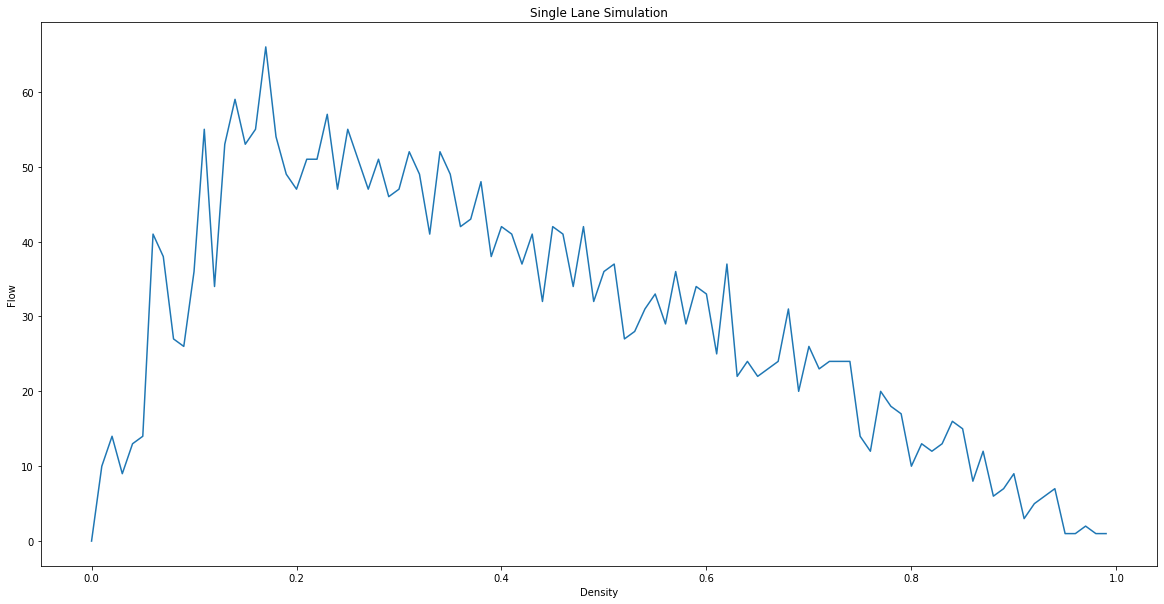

In [7]:
#plotting the flow rate for a given length, max_v and slowdown prob over different densities after 100 iterations
random.seed(42)

length = 100
max_v = 5
slowdown_prob = 0.2
iterations = 100

test_cases = []
flow_1 = []
densities = []

 
for i in range(0,100):
    densities.append((i/100))
    test_cases.append(trafficsimulator(length, i/100, max_v, slowdown_prob))
    for j in range(0,iterations):
        test_cases[i].update()
    flow_1.append(test_cases[i].counter)


%matplotlib inline 
plt.figure(figsize=(20,10))        
plt.plot(densities, flow_1)
plt.title("Single Lane Simulation")
plt.xlabel("Density")
plt.ylabel("Flow")
plt.show()

In [0]:
#flow rate for a given length and slowdown prob over different densities after 100 iterations for different max_v
random.seed(42)

length = 100
slowdown_prob = 0.2
iterations = 100

flows = [[] for i in range(10)]
initial_density = np.linspace(0.01, 1, 30)

for density in initial_density:
    flow = trafficsimulator(length, density, 1, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[0].append(flow.counter)
    flow = trafficsimulator(length, density, 2, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[1].append(flow.counter)
    flow = trafficsimulator(length, density, 3, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[2].append(flow.counter)
    flow = trafficsimulator(length, density, 4, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[3].append(flow.counter)
    flow = trafficsimulator(length, density, 5, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[4].append(flow.counter)
    flow = trafficsimulator(length, density, 6, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[5].append(flow.counter)
    flow = trafficsimulator(length, density, 7, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[6].append(flow.counter)
    flow = trafficsimulator(length, density, 20, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[7].append(flow.counter)
    flow = trafficsimulator(length, density, 100, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[8].append(flow.counter)
    flow = trafficsimulator(length, density, 1000, slowdown_prob)
    for j in range(0,iterations):
        flow.update()
    flows[9].append(flow.counter)
    

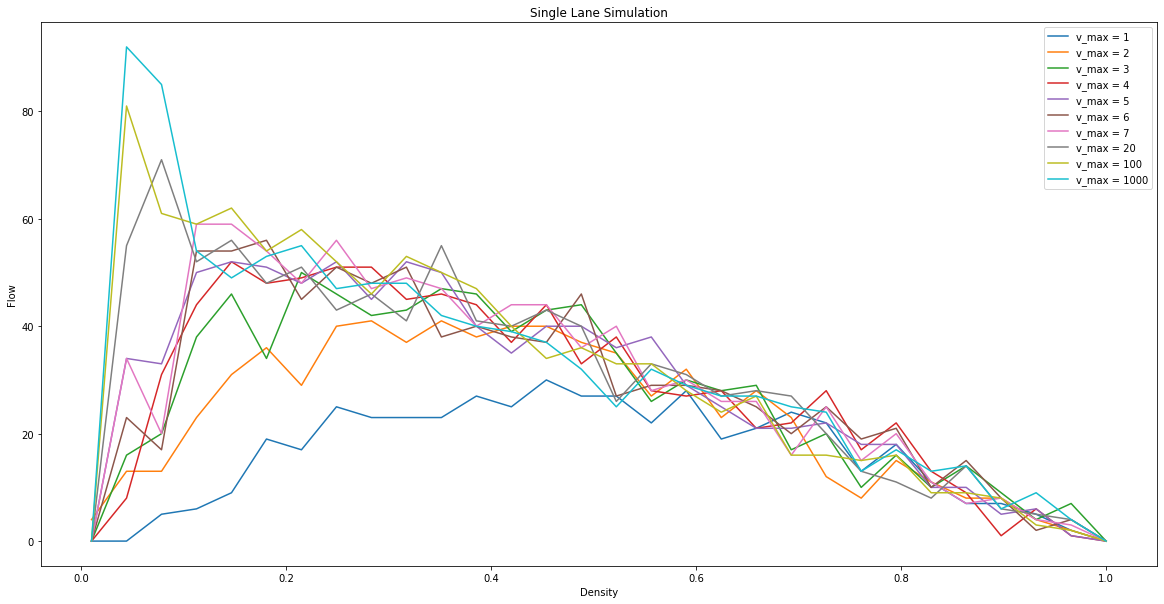

In [9]:
%matplotlib inline 
plt.figure(figsize=(20,10))   
plt.plot(initial_density, flows[0], label = "v_max = 1")
plt.plot(initial_density, flows[1], label = "v_max = 2")
plt.plot(initial_density, flows[2], label = "v_max = 3")
plt.plot(initial_density, flows[3], label = "v_max = 4")
plt.plot(initial_density, flows[4], label = "v_max = 5")
plt.plot(initial_density, flows[5], label = "v_max = 6")
plt.plot(initial_density, flows[6], label = "v_max = 7")
plt.plot(initial_density, flows[7], label = "v_max = 20")
plt.plot(initial_density, flows[8], label = "v_max = 100")
plt.plot(initial_density, flows[9], label = "v_max = 1000")
plt.legend()
plt.title("Single Lane Simulation")
plt.xlabel("Density")
plt.ylabel("Flow")
plt.show()

9


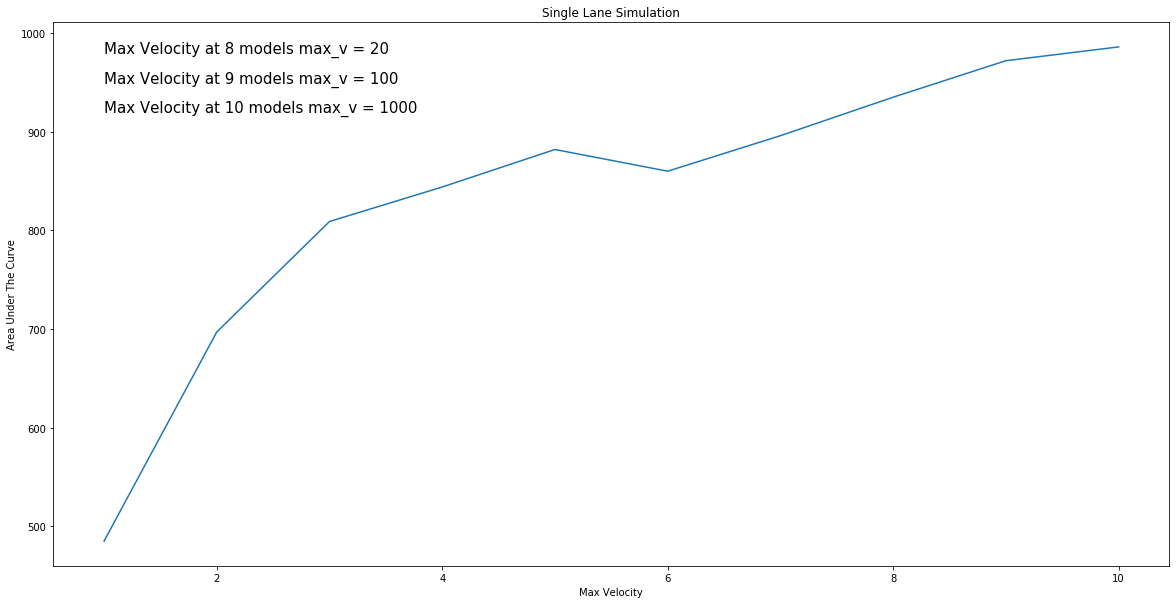

In [10]:
#finding the area under the curve for each of the different max_v to find the most optimal v_max
areas = []
maxv = []
for i in range(10):
  areas.append(trapz(flows[i], dx=1))
  maxv.append(i+1)

max_area = max(areas)
for i in range(10):
  if max_area == areas[i]:
    max_i = i
print (max_i)

plt.figure(figsize=(20,10)) 
plt.plot(maxv, areas)
plt.title("Single Lane Simulation")
plt.xlabel("Max Velocity")
plt.ylabel("Area Under The Curve")
plt.text(1, 980, r"Max Velocity at 8 models max_v = 20", fontsize=15)
plt.text(1, 950, r"Max Velocity at 9 models max_v = 100", fontsize=15)
plt.text(1, 920, r"Max Velocity at 10 models max_v = 1000", fontsize=15)
#red_dot, = plt.plot(z, "ro", markersize=15)
#plt.legend([red_dot, red_dot, white_cross] ["Max Velocity at 8 models max_v = 20", "Max Velocity at 9 models max_v = 100", "Max Velocity at 10 models max_v = 1000"])
plt.show()

In [0]:
#defining the traffic simulation object
class ml_trafficsimulator:

    #storing the pre-specified values for future use in the model implementation
    def __init__(self, road_length, density, max_velocity, random_p, switch_p):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.random_p = random_p
        self.switch_p = switch_p
        self.counter = 0
        self.initialize()

    #this funtion initializes two one-dimensional arrays filled with negative values to model the real-world road
    #and fills it with vehicles at random locations with random speeds based on the specified density    
    def initialize(self):
        #initializing the arrays
        self.sim_L1 = -np.ones(self.road_length, dtype = int)
        self.sim_L2= -np.ones(self.road_length, dtype = int)
        #filling with vehicles
        for i in range(2*self.road_length):
            if random.random() <= self.density:
              if i < self.road_length:
                self.sim_L1[i] = random.randint(0,self.max_velocity)
              else:
                self.sim_L2[i-self.road_length] = random.randint(0,self.max_velocity)
              
                
    #this function updates the array to simulate the movement on the road over one time step           
    def update(self):
        global rear
        global front
        #creating temporary arrays to store the updated locations and velocities of the vehicles
        next_sim_L1 = -np.ones(self.road_length, dtype = int)
        next_sim_L2 = -np.ones(self.road_length, dtype = int)
        
        #finding the locations of different vehicles present in both the arrays and storing them under seperate variable names
        car_indexes_L1 = np.argwhere(self.sim_L1  > -1)
        car_indexes_L2 = np.argwhere(self.sim_L2  > -1)
        number_of_cars_L1 = len(car_indexes_L1)
        number_of_cars_L2 = len(car_indexes_L2)
        dynamic_index_L1 = car_indexes_L1
        dynamic_index_L2 = car_indexes_L2
        
        #this for loop checks if the cars in Lane 1 need to switch lanes
        for i in range(number_of_cars_L1):
            #storing the current vehicles's location, next vehicles's location and current vehicle's velocity
            ci = car_indexes_L1[i]
            ni1 = car_indexes_L1[(i+1)%number_of_cars_L1]
            v = self.sim_L1[ci]
            #breaks out if there is enough space in the front for the car to move
            if ((ni1-ci)%self.road_length)-1 >= v+1:
              break
             #breaks out if there is a car in the same position on the other lane
            if self.sim_L2[ci] >= 0 or (ni1-ci)%self.road_length > v:
              break
            #checks if there is a car ahead in the other lane and adjust the speed of the car based on its location if it were to switch
            for i in range(1, self.max_velocity):
              if self.sim_L2[(ci + i)%self.road_length] >= 0:
                front = i - 1
                break
              else:
                front = self.max_velocity-1  
            #checks if there is a car in the other lane that can potentially crash if the car was to switch lanes
            for i in range(1,self.max_velocity):
              if self.sim_L2[(ci - i)%self.road_length] >= 0:
                rear = False
              else:
                rear = True
            #given the conditions, the lane is changed the indexes are updated 
            if front >= v and rear == True and random.random() <= self.switch_p:
              curr_index = np.argwhere(dynamic_index_L1 == ci)
              update_index_L1 = np.delete(dynamic_index_L1, curr_index)
              dynamic_index_L1 = update_index_L1

              dynamic_index_L2 = dynamic_index_L2.flatten()
              insert = np.searchsorted(dynamic_index_L2, ci[0])
              dynamic_index_L2 = np.insert(dynamic_index_L2, insert, ci)

        #this for loop checks if the cars in Lane 2 need to switch lanes with same mechanisms as the previous function
        for i in range(number_of_cars_L2):
            ci = car_indexes_L2[i]
            ni2 = car_indexes_L2[(i+1)%number_of_cars_L2]
            v = self.sim_L2[ci]
            
            if ((ni2-ci)%self.road_length) >= v+1:
              break
             
            if self.sim_L1[ci] >= 0:
              break

            for i in range(1, self.max_velocity):
              if self.sim_L1[(ci + i)%self.road_length] >= 0:
                front = i - 1
                break
              else:
                front = self.max_velocity-1  
            
            for i in range(1,self.max_velocity):
              if self.sim_L1[(ci - i)%self.road_length] >= 0:
                rear = False
              else:
                real = True

            if front >= v and rear == True and random.random() <= self.switch_p:
              curr_index = np.argwhere(dynamic_index_L2 == ci)
              update_index_L2 = np.delete(dynamic_index_L2, curr_index)
              dynamic_index_L2 = update_index_L2

              dynamic_index_L1 = dynamic_index_L1.flatten()
              insert = np.searchsorted(dynamic_index_L1, ci[0])
              dynamic_index_L1 = np.insert(dynamic_index_L1, insert, ci)            

        #updating the locations of the vehicles in lane 1    
        for i in range(len(dynamic_index_L1)):
          #storing the current vehicles's location, next vehicles's location and current vehicle's velocity
          ci = dynamic_index_L1[i]
          ni = dynamic_index_L1[(i+1)%len(dynamic_index_L1)]
          v = self.sim_L1[ci]
          #calculating the distance between the current vehicle and the next one
          distance = (ni-ci)%self.road_length
          #accelerating the vehicle 
          if v < self.max_velocity and distance >= v:
              v += 1
          #slowing down the vehicle   
          if v > 0 and distance <= v:
              v = distance-1
          #slowing random vehicles down to add noise      
          if v > 0 and random.random() <= self.random_p:
              v = v-1
          #updating the temporary array        
          next_sim_L1[(ci+v)% self.road_length] = v
          #counting the number of vehicles passing through the last cell  
          if ci + v >= self.road_length:
              self.counter += 1

        #updating the locations of the vehicles in lane 2 with same mechanisms as the previous function
        for i in range(len(dynamic_index_L2)):
          ci = dynamic_index_L2[i]
          ni = dynamic_index_L2[(i+1)%len(dynamic_index_L2)]
          v = self.sim_L2[ci]
          
          distance = (ni-ci)%self.road_length
          if v < self.max_velocity and distance >= v:
              v += 1
                
          if v > 0 and distance <= v:
              v = distance-1
                
          if v > 0 and random.random() <= self.random_p:
              v = v-1
                
          next_sim_L2[(ci+v)% self.road_length] = v
            
          if ci + v >= self.road_length:
              self.counter += 1

        #updating the simulation         
        self.sim_L1 = next_sim_L1
        self.sim_L2 = next_sim_L2

   #function to display the simulation for every time-step 
    def display(self):
        print(''.join('-' if x == -1 else str(x) for x in self.sim_L1))
        print(''.join('.' if x == -1 else str(x) for x in self.sim_L2))

                              


In [12]:
#defining different parameters for the traffic simulation so that they can be changed in the future
#for experimentation
#length of the road
length = 180
density = 0.2
max_v = 5
slowdown_prob = 0.2
switch_prob = 0.8
iterations = 20

random.seed(42)

Simulation_2 = ml_trafficsimulator(length, density, max_v, slowdown_prob, switch_prob)

for i in range(iterations):
    Simulation_2.update()
    Simulation_2.display()
    
Simulation_2.counter

10--1-0-1---2------100--2-----------1---------3-------5----1------5------------1--2----4------4-1---0------2--1---3-1---3-----5---------0-1--0-1---2------------5---200-1--------3--
....1.........1..2...300.1......5............2.....5.....4...30.....3......1...3....1..1.0...3......3..2.......5.0.1........2...3..00.....5......2.0..2....3......4.....3...........
3-1--10---2----3---00-1----3---------1------------4-------4--2---------5---------2---3------5--1--2--1-------2--2--1--2-----4------5-----1--2-1--2----3------------300-1--2---------
0.....2........1....300.1.1..........5..........3.......5...30.1........4....2.....4..2.1.1.....3.....2...3....0..1.1.........2...20.1.........5..1.1...2......4.......5....4.......
-1--20-1-----3----300---2------4-------2---------------5----2---3-----------5------2-----4----2--2--2--2-------2--2--2---3------4-------5--20---2--2------4--------00-1--2---3------
.1.......3......1...000..1..2.............5.........4......30.1..2..........4...3....2.1.1..2..

21

In [13]:
length = 180
density = 0.4
max_v = 5
slowdown_prob = 0.2
switch_prob = 0.8
iterations = 20

random.seed(42)

Simulation_2 = ml_trafficsimulator(length, density, max_v, slowdown_prob, switch_prob)

for i in range(iterations):
    Simulation_2.update()
    Simulation_2.display()
    
Simulation_2.counter

-0--2-00-----5--10000---3--0----4--2---100--200-1-1--1--1---30----40--1--2--20-0--2---3---20-1---3--1--20-1---3--2-1--2----30-10-1-100--2--1-1----4--2000-10-----5--2--10----40-1--0
...00.10....1...00...3...2.1.1...2...3.0.1.1...20.1..2...3....40...3..1...3.1.......4..1.10000.1...3000..2.10.1...30..2..1.00...3.0...2.......4.1.100....4..0....4..1.1.1...........
1-1--100------1-0000-1----2-1-----2---3000--00-1-1-1---2--2-0-1---00----2--20-1-1----3---30-1--2---2-1-0-1--2---2-1--2---3-0-10-1-100-1---2-1--2----2000-10-1-----1---20-1---0-1--2-
...00.0.1....1..0.1.....3.1.1..2....30..10...2.0.1..2...3....40.1....2.1...1..2.......2.10000.1..2.000.1..10.1..2.0.1...20.00...0..1.....3....0..100.1.....2.1.....2.10..1..........
-1-1-000-------1000-1--2---1--2-----2-000-1-0-1-1-1--2---20-0---2-0-1-----20-10---2----2-00---2---3-10--1--2---3-1--2---3-1-10-1-100-1--2--1--2---3-000-10-1-1-----1--00--1---1--2-1
...0.1.1..2....2.1..2....1.1..2...3.0.1.0.1...1.1..2..2....3.0.1..2...1..2..1....3.....10000.1.

14

In [14]:
length = 180
density = 0.6
max_v = 5
slowdown_prob = 0.2
switch_prob = 0.8
iterations = 20

random.seed(42)

Simulation_2 = ml_trafficsimulator(length, density, max_v, slowdown_prob, switch_prob)

for i in range(iterations):
    Simulation_2.update()
    Simulation_2.display()
    
Simulation_2.counter

10--2-00-1-10-1-1000---30---300---3-100-1-00-1--20-0-100000-00-0-1-10-1-10--2000--1-1000-10--20-1--20-1-1-1----100000-1-100--2--2-100-1-1-000-10-----50-1-10--2000000000-1-10000000-
10..20.1..0....4000.1.1..1.1..1..2000.1000.1.1.1.1..1....2..20.10000.10.10000.100.1...30...300.10...3.10.10000.1.100..20.100.1000..2..20.1..200.10000000.1.10.1..2..2.00.1..2.00000.
0-1--10-1-100--1000-1--0-1--00-1---100-1-10-1--20-1-100000-10-1-1-10-1-10-1-0000---1000-10-1-0-1--20-1-1-1--2--00000-1-1000---1-0-00-1-1-100-100-----00--10-1-000000000-1-10000000-1
0.1.00..1..1...000.1.1.1..1..2.1.000.1000.1.1.1.1..2..2....20.10000.10.10000.1000...2.00...00.10.1...100.0000.1.1000..0.100.1000.1..1.0.1..200.100000000..10.1..2..2.100..1..100000.
-1-1-00--100-1-000-1--2-1--20-1--2-00-1-10-1--20-1-100000-100--1-10-1-100--1000-1--000-10-10--1--20-1-1-1--2--20000-1-1000-1--0-0-0-1-1-100-100-1----00--00--1000000000--10000000-10
.10.0.1...2.1..00.1.1.1..2.1..10.00.1000.1.10..1..2..2...3.00.0000.10.10000.10000....10.1..00.0

16

Text(0, 0.5, 'Flow')

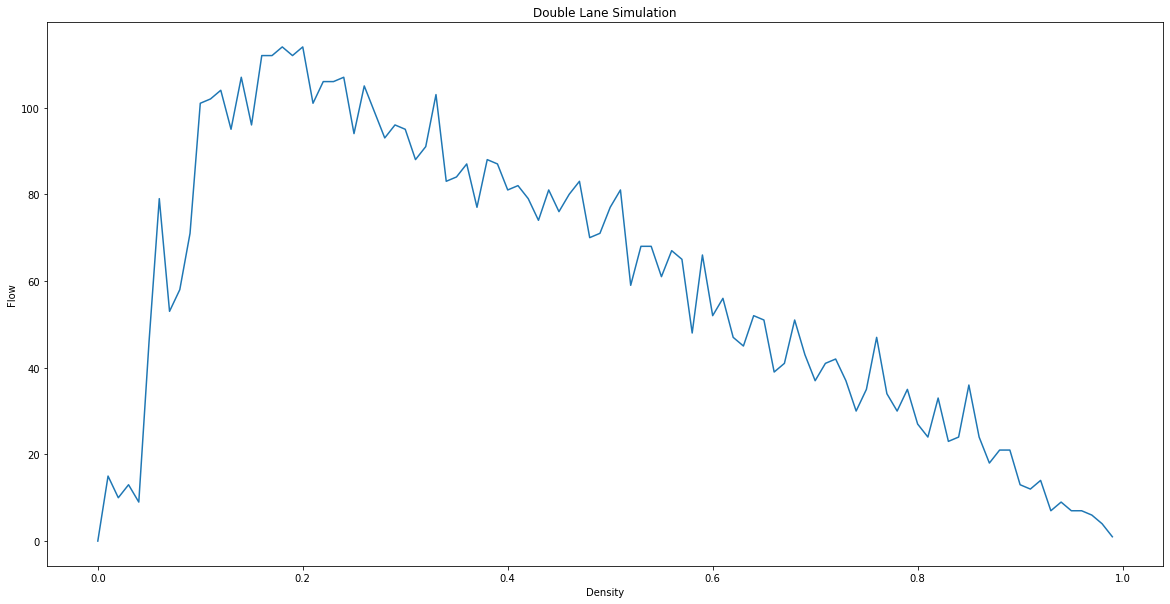

In [15]:
random.seed(42)

length = 100
max_v = 5
slowdown_prob = 0.2
switch_prob = 0.8
iterations = 100

test_cases_ml = []
flow_ml = []
densities_ml = []

 
for i in range(0,100):
    densities_ml.append((i/100))
    test_cases_ml.append(ml_trafficsimulator(length, i/100, max_v, slowdown_prob, switch_prob))
    for j in range(0,iterations):
        test_cases_ml[i].update()
    flow_ml.append(test_cases_ml[i].counter)
    
%matplotlib inline 
plt.figure(figsize=(20,10))       
plt.plot(densities_ml, flow_ml)
plt.title("Double Lane Simulation")
plt.xlabel("Density")
plt.ylabel("Flow")

Text(0, 0.5, 'Flow')

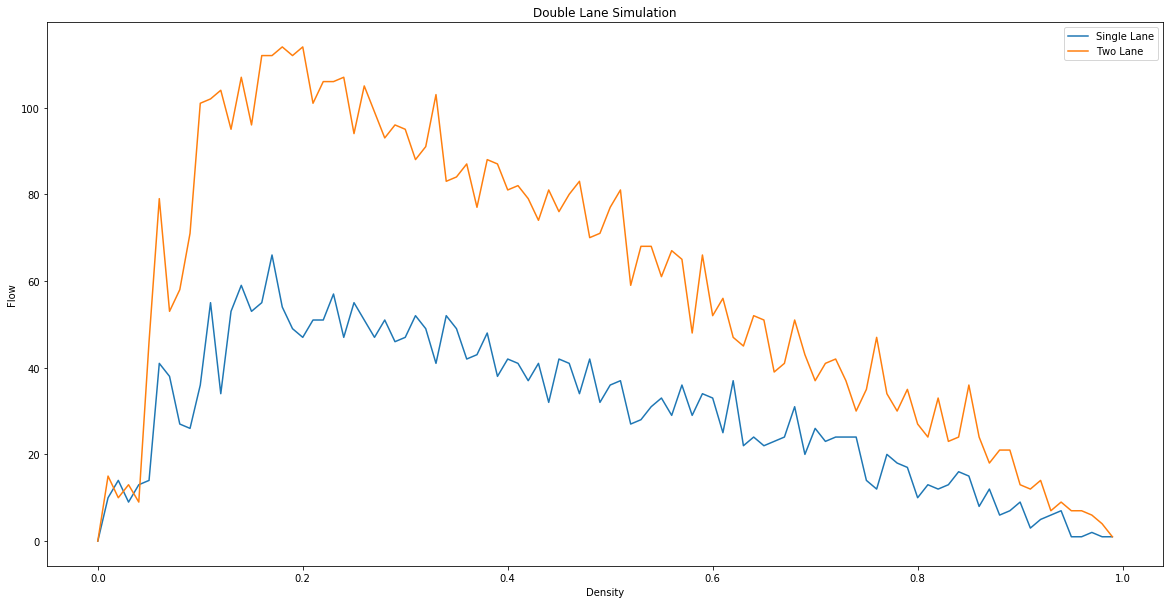

In [16]:
%matplotlib inline 
plt.figure(figsize=(20,10)) 
plt.plot(densities, flow_1, label = "Single Lane")      
plt.plot(densities_ml, flow_ml, label = "Two Lane")
plt.legend()
plt.title("Double Lane Simulation")
plt.xlabel("Density")
plt.ylabel("Flow")

In [0]:
random.seed(42)

length = 100
slowdown_prob = 0.2
switch_prob = 0.8
iterations = 100

flows = [[] for i in range(10)]
initial_density = np.linspace(0.01, 1, 30)

for density in initial_density:
    flow = ml_trafficsimulator(length, density, 1, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[0].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 2, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[1].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 3, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[2].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 4, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[3].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 5, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[4].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 6, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[5].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 7, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[6].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 20, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[7].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 100, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[8].append(flow.counter)
    flow = ml_trafficsimulator(length, density, 1000, slowdown_prob, switch_prob)
    for j in range(0,iterations):
        flow.update()
    flows[9].append(flow.counter)
    

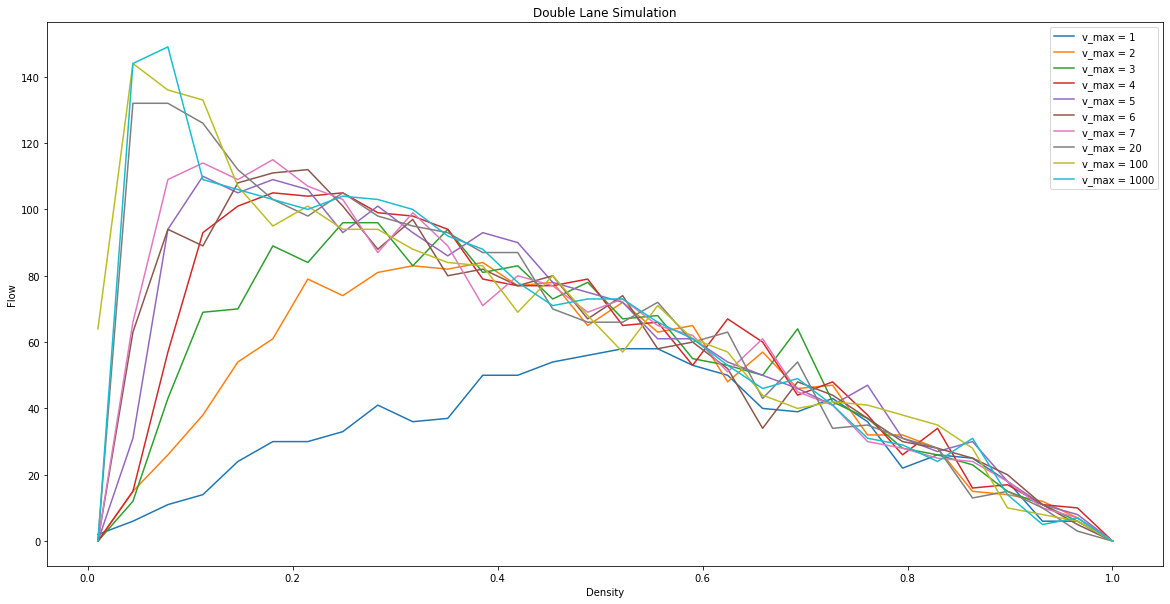

In [18]:
%matplotlib inline 
plt.figure(figsize=(20,10))   
plt.plot(initial_density, flows[0], label = "v_max = 1")
plt.plot(initial_density, flows[1], label = "v_max = 2")
plt.plot(initial_density, flows[2], label = "v_max = 3")
plt.plot(initial_density, flows[3], label = "v_max = 4")
plt.plot(initial_density, flows[4], label = "v_max = 5")
plt.plot(initial_density, flows[5], label = "v_max = 6")
plt.plot(initial_density, flows[6], label = "v_max = 7")
plt.plot(initial_density, flows[7], label = "v_max = 20")
plt.plot(initial_density, flows[8], label = "v_max = 100")
plt.plot(initial_density, flows[9], label = "v_max = 1000")
plt.legend()
plt.title("Double Lane Simulation")
plt.xlabel("Density")
plt.ylabel("Flow")
plt.show()

9


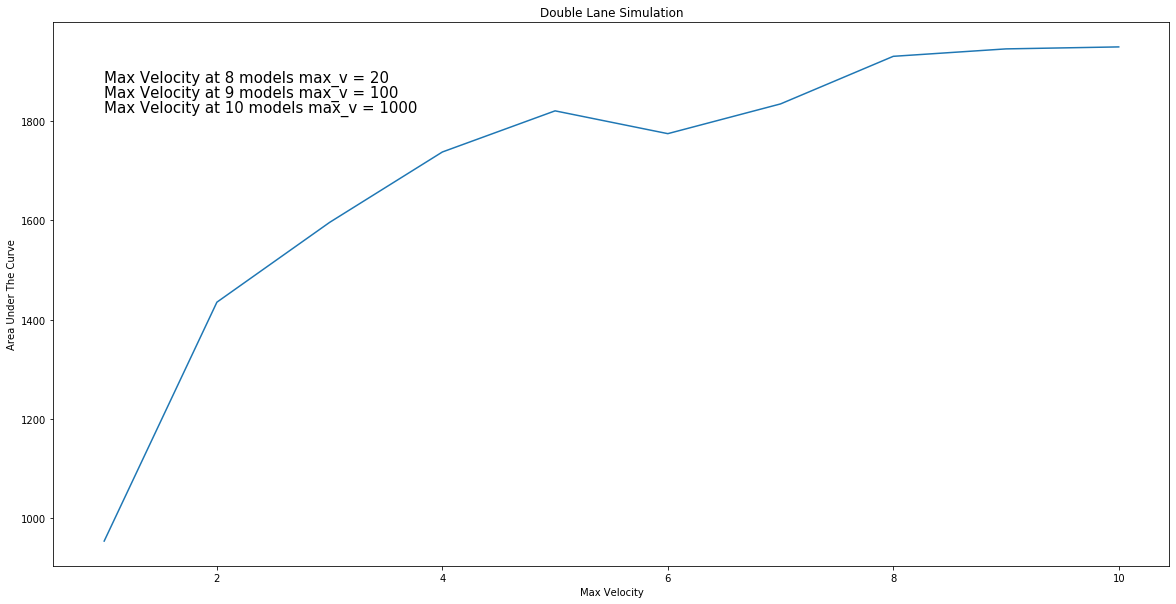

In [19]:
#finding the area under the curve for each of the different max_v to find the most optimal v_max
areas_ml = []
maxv_ml = []
for i in range(10):
  areas_ml.append(trapz(flows[i], dx=1))
  maxv_ml.append(i+1)

max_area_ml = max(areas_ml)
for i in range(10):
  if max_area_ml == areas_ml[i]:
    max_i = i
print (max_i)

plt.figure(figsize=(20,10)) 
plt.plot(maxv_ml, areas_ml)
plt.title("Double Lane Simulation")
plt.xlabel("Max Velocity")
plt.ylabel("Area Under The Curve")
plt.text(1, 1880, r"Max Velocity at 8 models max_v = 20", fontsize=15)
plt.text(1, 1850, r"Max Velocity at 9 models max_v = 100", fontsize=15)
plt.text(1, 1820, r"Max Velocity at 10 models max_v = 1000", fontsize=15)
#red_dot, = plt.plot(z, "ro", markersize=15)
#plt.legend([red_dot, red_dot, white_cross] ["Max Velocity at 8 models max_v = 20", "Max Velocity at 9 models max_v = 100", "Max Velocity at 10 models max_v = 1000"])
plt.show()